# Data Cleaning Process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

import tools.helpers as th
import tools.data_preparation as dp
import tools.data_visualization as dv

In [2]:
# LOAD DATA WITH INITIAL CLEAN
df = pd.read_csv('data/kc_house_data.csv')
final_df = dp.initial_clean(df.copy())

In [3]:
new_names = {
    'date': 'recently_sold',
    'bedrooms': 'high_bed',
    'bathrooms': 'high_bath',
    'sqft_living': 'l_sqft_living',
    'sqft_lot': 'l_sqft_lot',
    'floors': 'single_floor',
    'view': 'been_viewed',
    'condition': 'good_condition',
    'grade': 'high_grade',
    'sqft_above': 'l_sqft_above',
    'sqft_basement': 'has_basement',
    'yr_built': 'age',
    'yr_renovated': 'recently_renovated',
    
}

In [4]:
# 'date' column to 'recently_sold'
final_df['date'] = final_df['date'].map(lambda x: x.year)
final_df['date'] = np.where(final_df['date'] == 2014, 0, 1)

# 'bedrooms' to 'high_bed', since 3 is most common value
final_df['bedrooms'] = np.where(final_df['bedrooms'] < 3, 0, 1)

# 'bathrooms' to 'high_bath', since 2.5 is most common value
final_df['bathrooms'] = np.where(final_df['bathrooms'] < 2.5, 0, 1)

# 'floors' to 'single_floor', since 1 is most common value
final_df['floors'] = np.where(final_df['floors'] == 1, 0, 1)

# 'view' to 'been_viewed'
final_df['view'] = np.where(final_df['view'] == 0, 0, 1)

# 'condition' to 'good_condition'
final_df['condition'] = np.where(final_df['condition'] < 3.5, 0, 1)
# MINMAX ??

# 'grade' to 'high_grade'
final_df['grade'] = np.where(final_df['grade'] < 7, 0, 1)

# 'sqft_basement' to 'has_basement'
final_df['sqft_basement'] = np.where(final_df['sqft_basement'] == 0, 0, 1)

# 'yr_renovated' to 'recently_renovated', ie renovated after 2000
final_df['yr_renovated'] = np.where(final_df['yr_renovated'] < 2000, 0, 1)

final_df.rename(columns=new_names, inplace=True)

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
subset_i = df[['date',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',]]
vifs = pd.DataFrame()
vifs['feature'] = df.columns
vifs['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(subset_i.columns))]
print(vifs)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# LOG TRANSFORMS




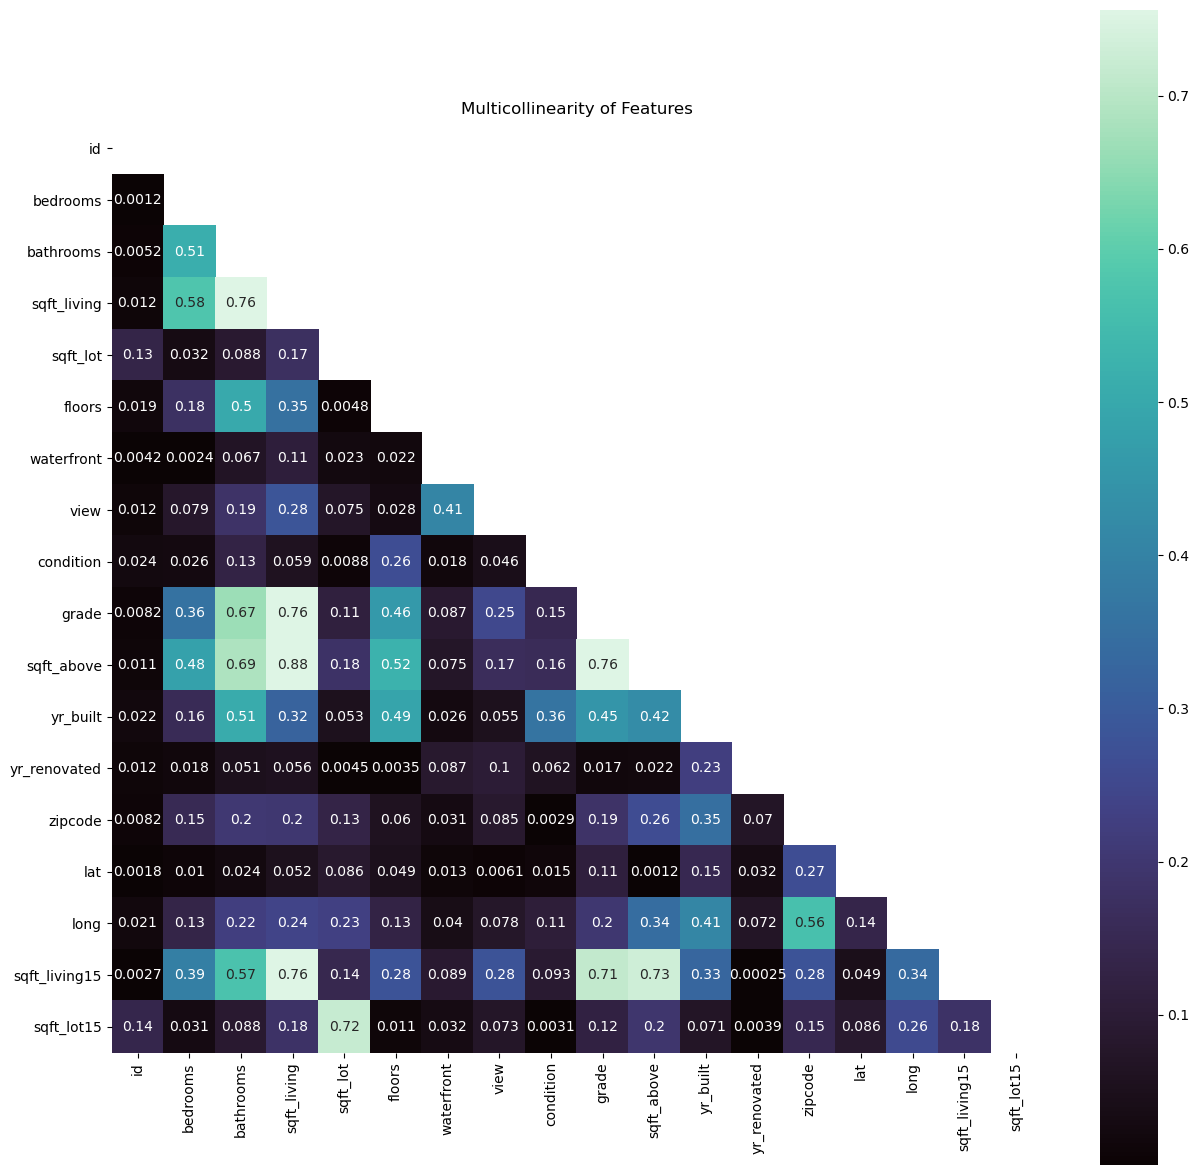

In [5]:
dv.corr_heatmap(df)

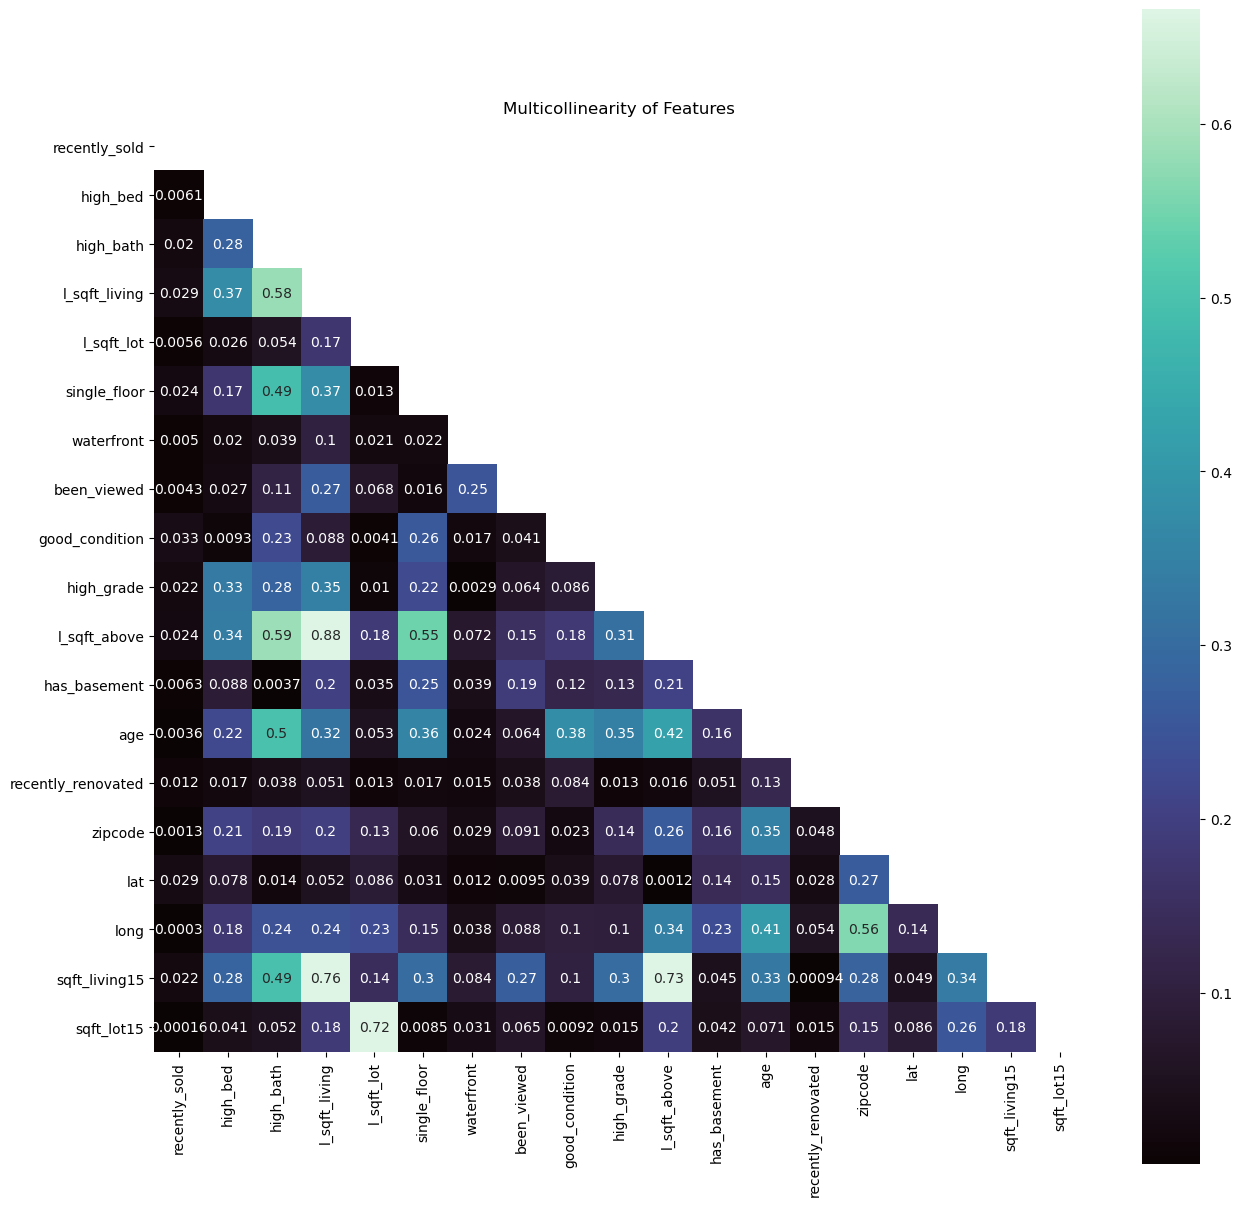

In [6]:
dv.corr_heatmap(final_df)

In [17]:
th.get_value_counts(final_df, highest_two=True)

price :
350000.0    172
450000.0    172
Name: price, dtype: int64 

sqft_living :
1300    138
1400    135
Name: sqft_living, dtype: int64 

sqft_lot :
5000    358
6000    290
Name: sqft_lot, dtype: int64 

waterfront :
0.0    21451
1.0      146
Name: waterfront, dtype: int64 

sqft_above :
1300    212
1010    210
Name: sqft_above, dtype: int64 

sqft_basement :
0.0      13280
600.0      217
Name: sqft_basement, dtype: int64 

yr_built :
2014    559
2006    453
Name: yr_built, dtype: int64 

yr_renovated :
0.0       20853
2014.0       73
Name: yr_renovated, dtype: int64 

zipcode :
98103    602
98038    589
Name: zipcode, dtype: int64 

lat :
47.6624    17
47.5491    17
Name: lat, dtype: int64 

long :
-122.29    115
-122.30    111
Name: long, dtype: int64 

sqft_living15 :
1540    197
1440    195
Name: sqft_living15, dtype: int64 

sqft_lot15 :
5000    427
4000    356
Name: sqft_lot15, dtype: int64 

recently_sold :
0    14622
1     6975
Name: recently_sold, dtype: int64 

high_bed :
1

In [4]:
# final_df

2014    14622
2015     6975
Name: date, dtype: int64

In [4]:
final_df.date.map(lambda x: x.year).value_counts()

2014    14622
2015     6975
Name: date, dtype: int64

In [6]:
final_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
fig, axes = plt.subplots(7, 3)
for ax, col in zip(axes.flatten(), final_df.columns)
    ax.hist(x=)

In [15]:
fig, axes = plt.subplots(7, 3, figsize=(17, 17))

for ax, col in zip(axes.flatten(), final_df.columns):
    final_df.plot.scatter(x=col, y='price', ax=ax)

In [12]:
th.get_value_counts(final_df)

price :
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
sqft_living :
1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64
sqft_lot :
5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64
floors :
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64
waterfront :
0.0    21451
1.0      146
Name: waterfront, dtype: int64
view :
0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
condition :
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int6

## Handling Missing Values

#### Exploring incomplete features

In [5]:
# Replace '?' from 'sqft_basement' feature with '0.0', then coerce to float`

In [ ]:
final_df['sqft_basement'] = pd.to_numeric(final_df['sqft_basement'], errors='coerce')

In [ ]:
final_df['sqft_basement'] = final_df['sqft_basement'].str.replace('?', '0.0').astype(float)

In [ ]:
final_df['sqft_basement'].value_counts()

In [ ]:
final_df.info()

In [ ]:

final_df.hist(bins='auto', figsize=(18, 15))

In [ ]:
final_df.corrwith(final_df['price']).sort_values(ascending=False)